# **Preprocessing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  13

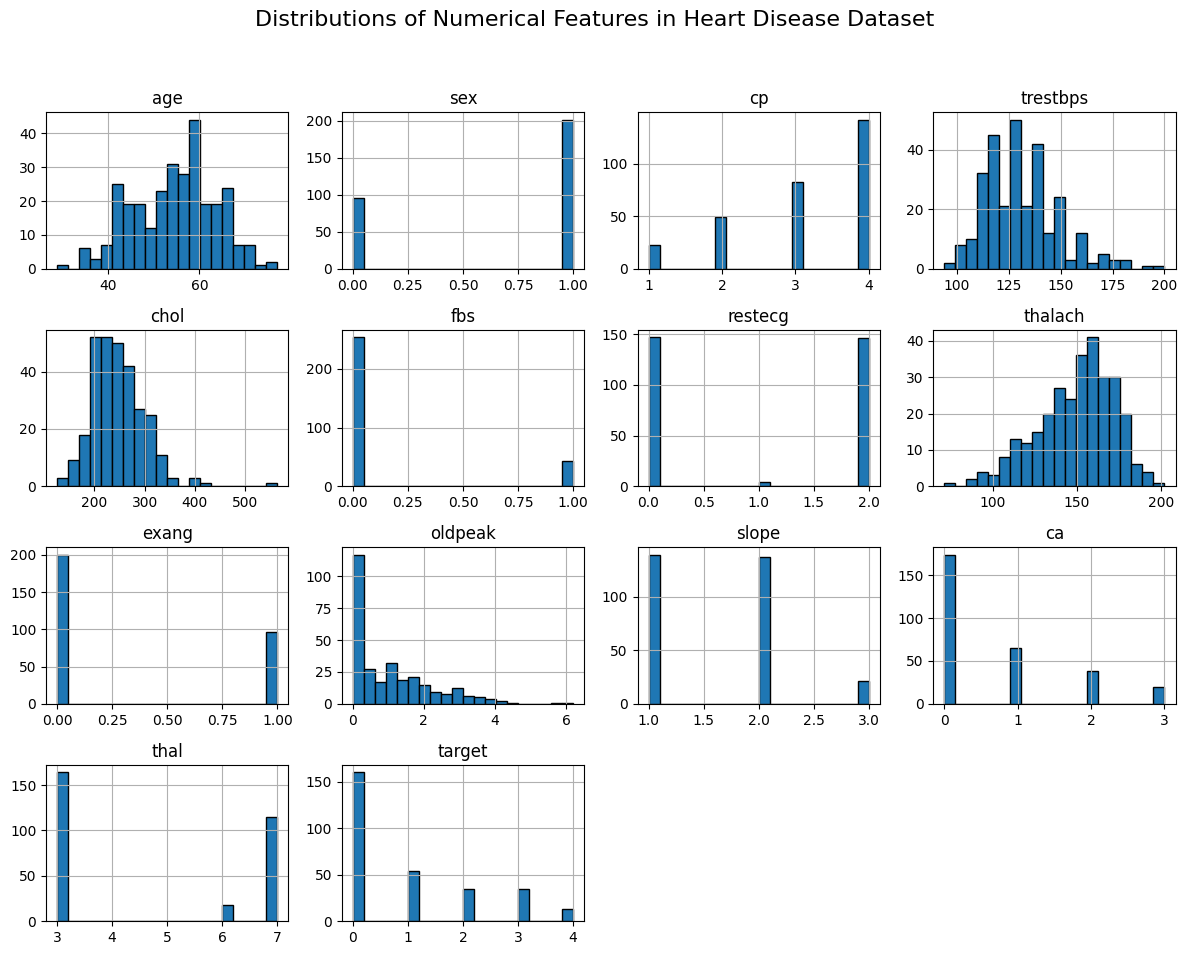

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Heart Disease dataset
file_path = "processed.cleveland.data"  # Ensure this path is correct
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(file_path, header=None, names=columns)

# Display dataset info
data.info()

# Replace '?' with NaN and drop missing values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Convert categorical columns to numeric if necessary
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)

# Statistical summary of the dataset
print(data.describe())

# Visualize distributions of numerical features
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numerical Features in Heart Disease Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Heart Disease dataset
file_path = "processed.cleveland.data"  # Ensure this is the correct path to your dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(file_path, header=None, names=columns)

# Replace '?' with NaN and drop missing values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Ensure all categorical columns are numeric by first converting them to floats and then to integers
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for column in categorical_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce').astype(int)

# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Split data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows to confirm
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,0,6,0
1,1.378929,1,4,1.596266,0.744555,0,2,-1.816334,1,0.381773,2,3,3,2
2,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,2,7,1
3,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,0,3,0
4,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,0,3,0


# Question 1:


## **Classification:**

### kNN


Best performance at K = 19
Best test accuracy: 0.6667


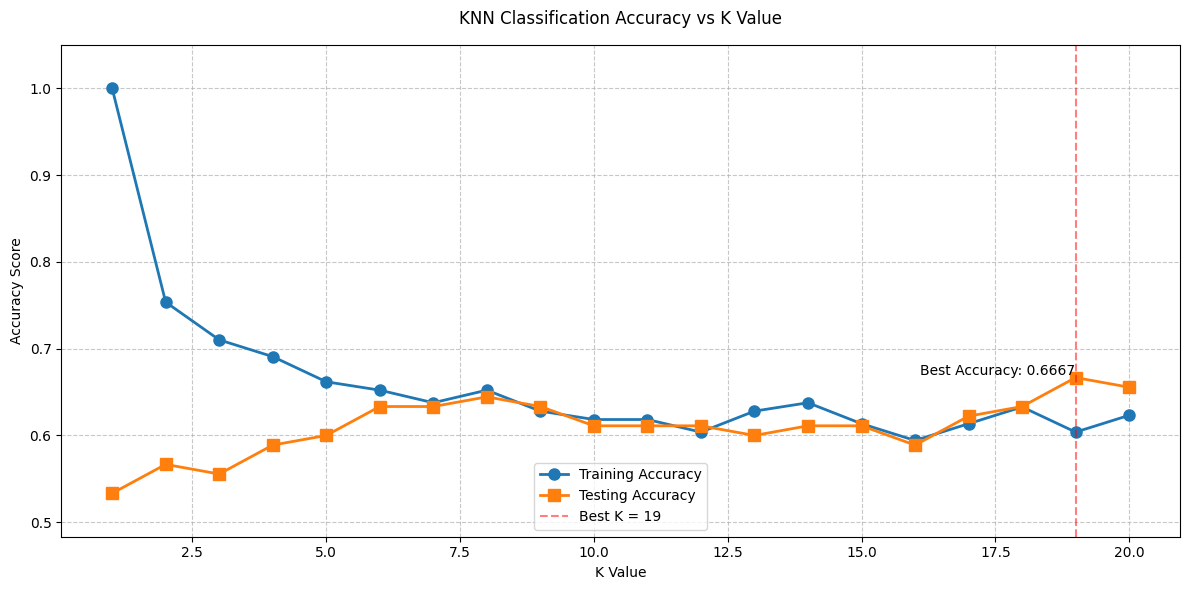

KNeighborsClassifier(n_neighbors=19)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the accuracy scores
k_train_scores = []
k_test_scores = []
k_values = range(1, 21)  # Testing K values from 1 to 20

# Calculate accuracy for each k value
for k in k_values:
    # Initialize and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate and store accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    k_train_scores.append(train_accuracy)
    k_test_scores.append(test_accuracy)

# Find the best K value based on test accuracy
best_k_index = np.argmax(k_test_scores)
best_k = k_values[best_k_index]
best_test_accuracy = k_test_scores[best_k_index]

print(f"\nBest performance at K = {best_k}")
print(f"Best test accuracy: {best_test_accuracy:.4f}")

# Create visualization
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy lines
plt.plot(k_values, k_train_scores, marker='o', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(k_values, k_test_scores, marker='s', label='Testing Accuracy', linewidth=2, markersize=8)

# Highlight the best K value
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.5, label=f'Best K = {best_k}')

# Customize the plot
plt.title('KNN Classification Accuracy vs K Value', fontsize=12, pad=15)
plt.xlabel('K Value', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_train_scores), min(k_test_scores)) - 0.05,
         max(max(k_train_scores), max(k_test_scores)) + 0.05)

# Add text annotation for best performance
plt.text(best_k, best_test_accuracy, f'Best Accuracy: {best_test_accuracy:.4f}',
         horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Train final model with best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)


### Decision Tree


Best performance at Max Depth = 3
Best test accuracy: 0.5556


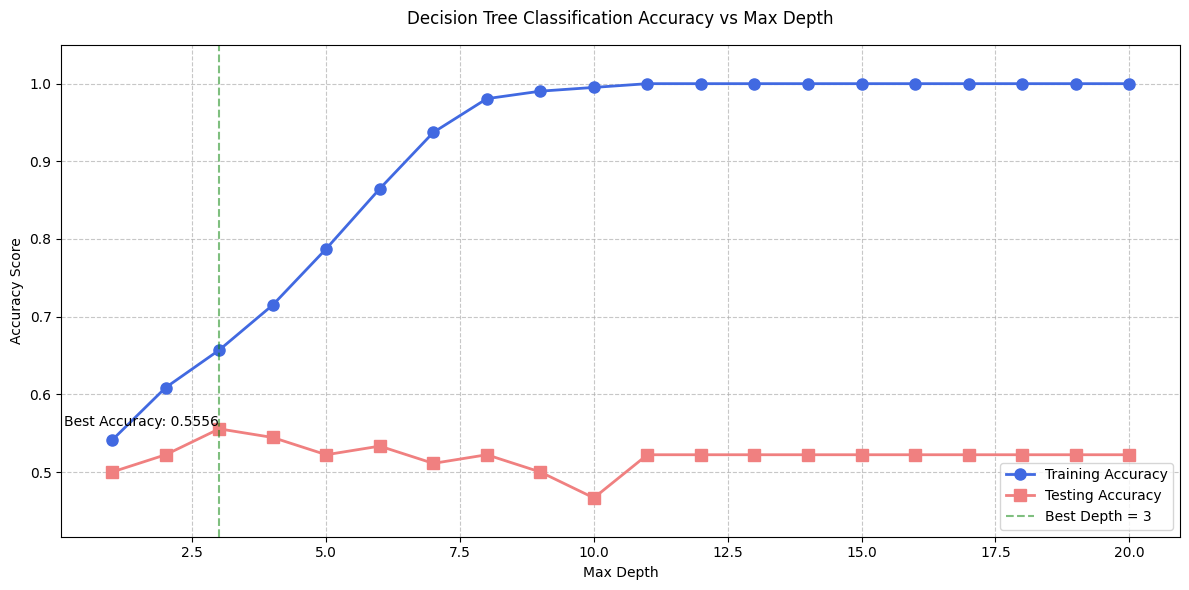

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the accuracy scores
train_scores = []
test_scores = []
max_depths = range(1, 21)  # Testing depth values from 1 to 20

# Calculate accuracy for each max_depth value
for depth in max_depths:
    # Initialize and train the model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    # Calculate and store accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Find the best depth value based on test accuracy
best_depth_index = np.argmax(test_scores)
best_depth = max_depths[best_depth_index]
best_test_accuracy = test_scores[best_depth_index]

print(f"\nBest performance at Max Depth = {best_depth}")
print(f"Best test accuracy: {best_test_accuracy:.4f}")

# Create visualization
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy lines
plt.plot(max_depths, train_scores, marker='o', label='Training Accuracy',
         linewidth=2, markersize=8, color='royalblue')
plt.plot(max_depths, test_scores, marker='s', label='Testing Accuracy',
         linewidth=2, markersize=8, color='lightcoral')

# Highlight the best depth value
plt.axvline(x=best_depth, color='g', linestyle='--', alpha=0.5,
            label=f'Best Depth = {best_depth}')

# Customize the plot
plt.title('Decision Tree Classification Accuracy vs Max Depth', fontsize=12, pad=15)
plt.xlabel('Max Depth', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(train_scores), min(test_scores)) - 0.05,
         max(max(train_scores), max(test_scores)) + 0.05)

# Add text annotation for best performance
plt.text(best_depth, best_test_accuracy,
         f'Best Accuracy: {best_test_accuracy:.4f}',
         horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Train final model with best depth value
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)


## Comparision

###Testing

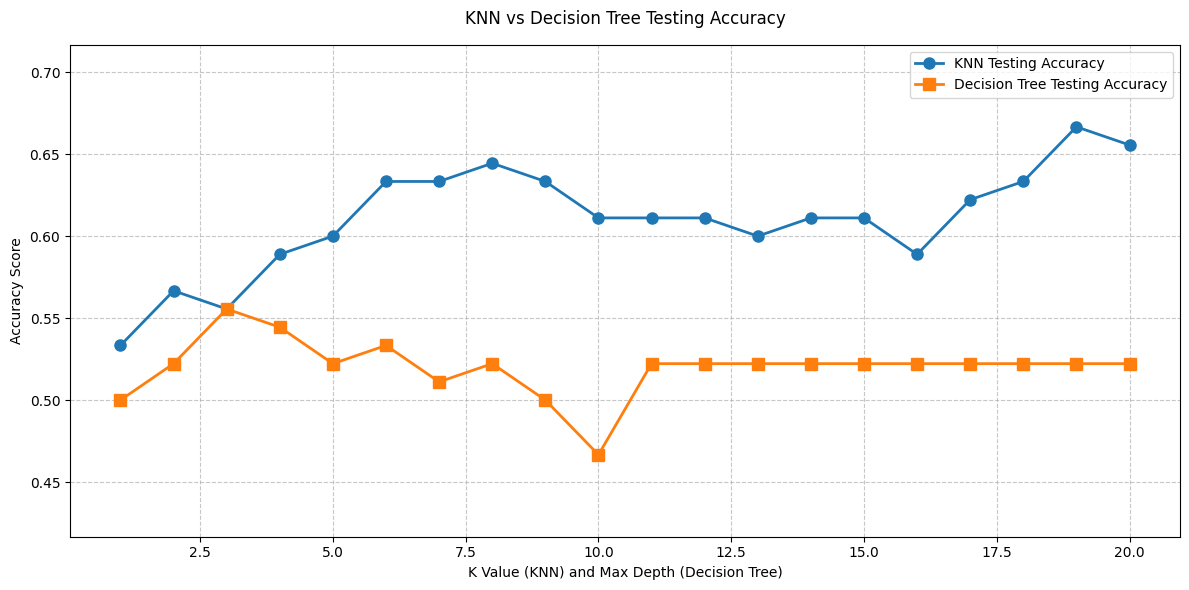

KNN Model is likely overfitting.
Decision Tree Model is likely overfitting.


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming k_test_scores and d_test_scores are defined from previous runs
# Also assuming you have k_train_scores and d_train_scores for training accuracies

plt.figure(figsize=(12, 6))

# Define x-values for KNN and Decision Tree for the plot
k_values = range(1, 21)  # K values for KNN
max_depths = range(1, 21)  # Max depths for Decision Tree

# Plot testing accuracy for KNN and Decision Tree
plt.plot(k_values, k_test_scores, marker='o', label='KNN Testing Accuracy', linewidth=2, markersize=8)
plt.plot(max_depths, test_scores, marker='s', label='Decision Tree Testing Accuracy', linewidth=2, markersize=8)

# Customize the plot
plt.title('KNN vs Decision Tree Testing Accuracy', fontsize=12, pad=15)
plt.xlabel('K Value (KNN) and Max Depth (Decision Tree)', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_test_scores), min(test_scores)) - 0.05,
         max(max(k_test_scores), max(test_scores)) + 0.05)

plt.tight_layout()
plt.show()

# Check for overfitting or underfitting for KNN
k_train_max = max(k_train_scores)
k_test_max = max(k_test_scores)

if k_train_max - k_test_max > 0.1:  # Threshold for overfitting
    print("KNN Model is likely overfitting.")
elif k_train_max < 0.7 and k_test_max < 0.7:  # Threshold for underfitting
    print("KNN Model is likely underfitting.")
else:
    print("KNN Model has a good fit.")

# Check for overfitting or underfitting for Decision Tree
d_train_max = max(train_scores)
d_test_max = max(test_scores)

if d_train_max - d_test_max > 0.1:  # Threshold for overfitting
    print("Decision Tree Model is likely overfitting.")
elif d_train_max < 0.7 and d_test_max < 0.7:  # Threshold for underfitting
    print("Decision Tree Model is likely underfitting.")
else:
    print("Decision Tree Model has a good fit.")


###Trainning


Best performance at K = 19
Best test accuracy: 0.6667

Best performance at Max Depth = 3
Best test accuracy: 0.5556


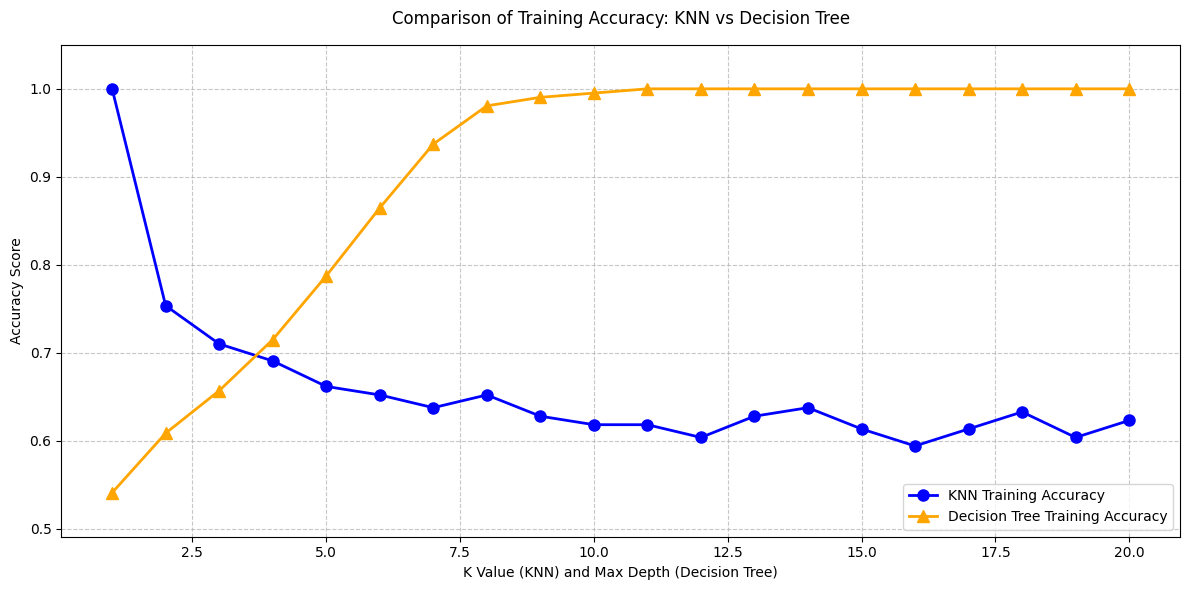

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are already defined

# KNN Classification
k_train_scores = []
k_test_scores = []
k_values = range(1, 21)  # Testing K values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    k_train_scores.append(train_accuracy)
    k_test_scores.append(test_accuracy)

best_k_index = np.argmax(k_test_scores)
best_k = k_values[best_k_index]
best_test_accuracy = k_test_scores[best_k_index]
print(f"\nBest performance at K = {best_k}")
print(f"Best test accuracy: {best_test_accuracy:.4f}")

# Decision Tree Classification
train_scores = []
test_scores = []
max_depths = range(1, 21)

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

best_depth_index = np.argmax(test_scores)
best_depth = max_depths[best_depth_index]
best_test_accuracy = test_scores[best_depth_index]
print(f"\nBest performance at Max Depth = {best_depth}")
print(f"Best test accuracy: {best_test_accuracy:.4f}")

# Create comparison plot for KNN and Decision Tree Training Accuracy
plt.figure(figsize=(12, 6))

# Plot KNN Training Accuracy
plt.plot(k_values, k_train_scores, marker='o', label='KNN Training Accuracy', linewidth=2, markersize=8, color='blue')

# Plot Decision Tree Training Accuracy
plt.plot(max_depths, train_scores, marker='^', label='Decision Tree Training Accuracy', linewidth=2, markersize=8, color='orange')

# Customize the plot
plt.title('Comparison of Training Accuracy: KNN vs Decision Tree', fontsize=12, pad=15)
plt.xlabel('K Value (KNN) and Max Depth (Decision Tree)', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_train_scores), min(train_scores)) - 0.05,
           max(max(k_train_scores), max(train_scores)) + 0.05)

# Show the plot
plt.tight_layout()
plt.show()


## **Regression:**

### kNN


Best performance at K = 12
Best test RMSE: 0.8520


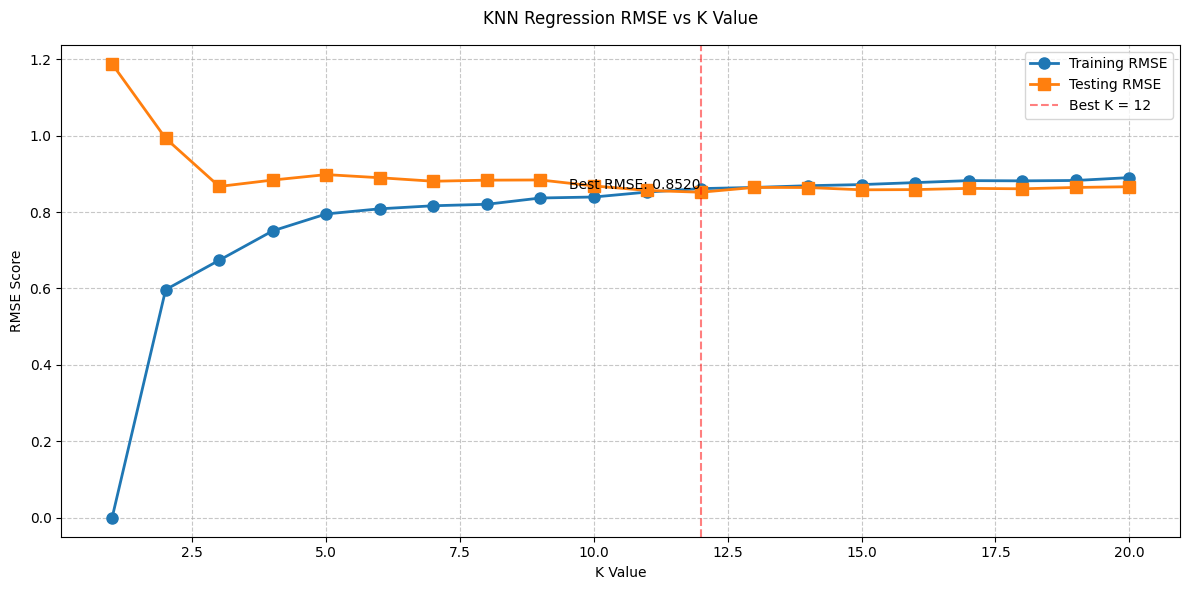

Final model test RMSE: 0.8520
Final model R² score: 0.4947


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the regression scores
k_train_scores = []
k_test_scores = []
k_values = range(1, 21)  # Testing K values from 1 to 20

# Calculate performance for each k value
for k in k_values:
    # Initialize and train the model
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)

    # Calculate and store performance scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    k_train_scores.append(train_rmse)
    k_test_scores.append(test_rmse)

# Find the best K value based on test RMSE
best_k_index = np.argmin(k_test_scores)
best_k = k_values[best_k_index]
best_test_rmse = k_test_scores[best_k_index]

print(f"\nBest performance at K = {best_k}")
print(f"Best test RMSE: {best_test_rmse:.4f}")

# Create visualization
plt.figure(figsize=(12, 6))

# Plot training and testing RMSE lines
plt.plot(k_values, k_train_scores, marker='o', label='Training RMSE', linewidth=2, markersize=8)
plt.plot(k_values, k_test_scores, marker='s', label='Testing RMSE', linewidth=2, markersize=8)

# Highlight the best K value
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.5, label=f'Best K = {best_k}')

# Customize the plot
plt.title('KNN Regression RMSE vs K Value', fontsize=12, pad=15)
plt.xlabel('K Value', fontsize=10)
plt.ylabel('RMSE Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_train_scores), min(k_test_scores)) - 0.05,
         max(max(k_train_scores), max(k_test_scores)) + 0.05)

# Add text annotation for best performance
plt.text(best_k, best_test_rmse, f'Best RMSE: {best_test_rmse:.4f}',
         horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Train final model with best K value
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train, y_train)

# Evaluate the final model on the test set
final_y_pred = best_knn_regressor.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_y_pred))
final_r2 = r2_score(y_test, final_y_pred)

print(f"Final model test RMSE: {final_rmse:.4f}")
print(f"Final model R² score: {final_r2:.4f}")


### Decision Tree


Best performance at Max Depth = 2
Best test RMSE: 0.9643


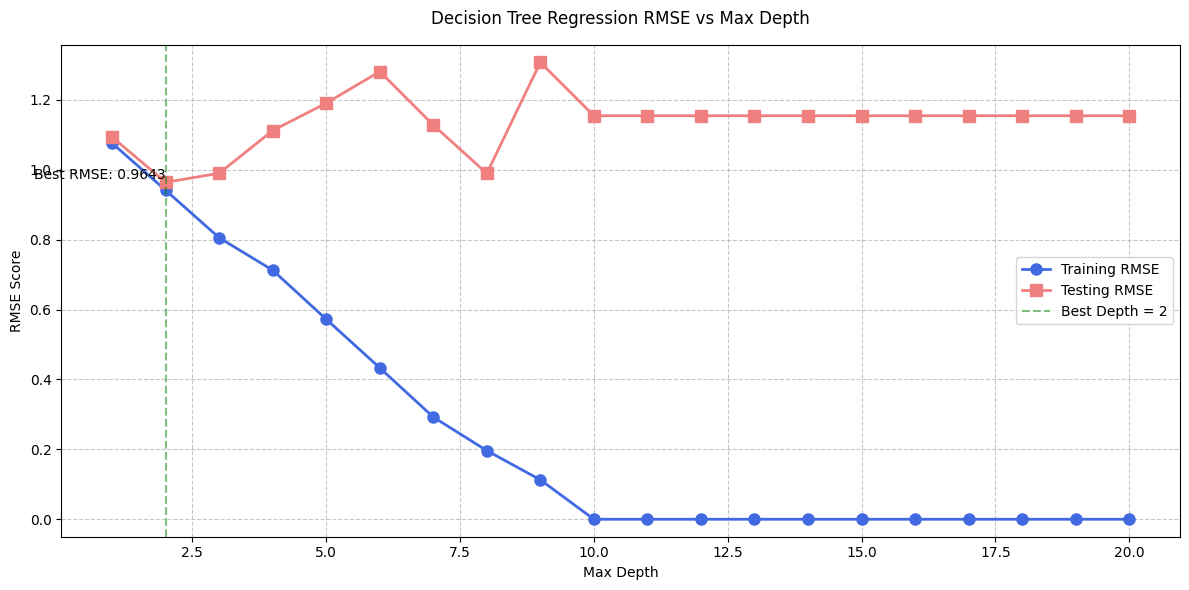

Final model test RMSE: 0.9643
Final model R² score: 0.3527


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the regression scores
train_rmse_scores = []
test_rmse_scores = []
max_depths = range(1, 21)  # Testing depth values from 1 to 20

# Calculate performance for each max_depth value
for depth in max_depths:
    # Initialize and train the model
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_regressor.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_train_pred = dt_regressor.predict(X_train)
    y_test_pred = dt_regressor.predict(X_test)

    # Calculate and store performance scores (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

# Find the best depth value based on test RMSE
best_depth_index = np.argmin(test_rmse_scores)
best_depth = max_depths[best_depth_index]
best_test_rmse = test_rmse_scores[best_depth_index]

print(f"\nBest performance at Max Depth = {best_depth}")
print(f"Best test RMSE: {best_test_rmse:.4f}")

# Create visualization
plt.figure(figsize=(12, 6))

# Plot training and testing RMSE lines
plt.plot(max_depths, train_rmse_scores, marker='o', label='Training RMSE',
         linewidth=2, markersize=8, color='royalblue')
plt.plot(max_depths, test_rmse_scores, marker='s', label='Testing RMSE',
         linewidth=2, markersize=8, color='lightcoral')

# Highlight the best depth value
plt.axvline(x=best_depth, color='g', linestyle='--', alpha=0.5,
            label=f'Best Depth = {best_depth}')

# Customize the plot
plt.title('Decision Tree Regression RMSE vs Max Depth', fontsize=12, pad=15)
plt.xlabel('Max Depth', fontsize=10)
plt.ylabel('RMSE Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(train_rmse_scores), min(test_rmse_scores)) - 0.05,
         max(max(train_rmse_scores), max(test_rmse_scores)) + 0.05)

# Add text annotation for best performance
plt.text(best_depth, best_test_rmse,
         f'Best RMSE: {best_test_rmse:.4f}',
         horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Train final model with best depth value
best_dt_regressor = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_dt_regressor.fit(X_train, y_train)

# Evaluate the final model on the test set
final_y_pred = best_dt_regressor.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_y_pred))
final_r2 = r2_score(y_test, final_y_pred)

print(f"Final model test RMSE: {final_rmse:.4f}")
print(f"Final model R² score: {final_r2:.4f}")


## Comparision

### Testing:

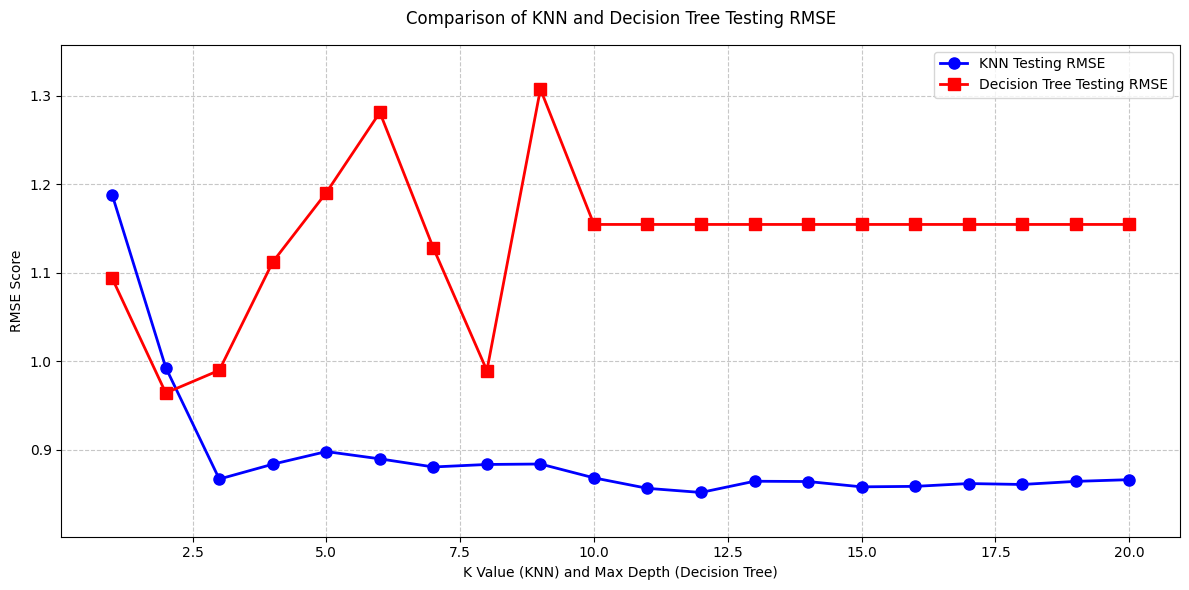

In [25]:
import matplotlib.pyplot as plt

# Assuming k_test_rmse_scores and test_rmse_scores from the previous models are available

# Create comparison plot for KNN and Decision Tree Testing RMSE
plt.figure(figsize=(12, 6))

# Plot KNN Testing RMSE
plt.plot(k_values, k_test_scores, marker='o', label='KNN Testing RMSE', linewidth=2, markersize=8, color='blue')

# Plot Decision Tree Testing RMSE
plt.plot(max_depths, test_rmse_scores, marker='s', label='Decision Tree Testing RMSE', linewidth=2, markersize=8, color='red')

# Customize the plot
plt.title('Comparison of KNN and Decision Tree Testing RMSE', fontsize=12, pad=15)
plt.xlabel('K Value (KNN) and Max Depth (Decision Tree)', fontsize=10)
plt.ylabel('RMSE Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_test_scores), min(k_test_scores)) - 0.05,
         max(max(test_rmse_scores), max(test_rmse_scores)) + 0.05)

# Show the plot
plt.tight_layout()
plt.show()


### Trainning

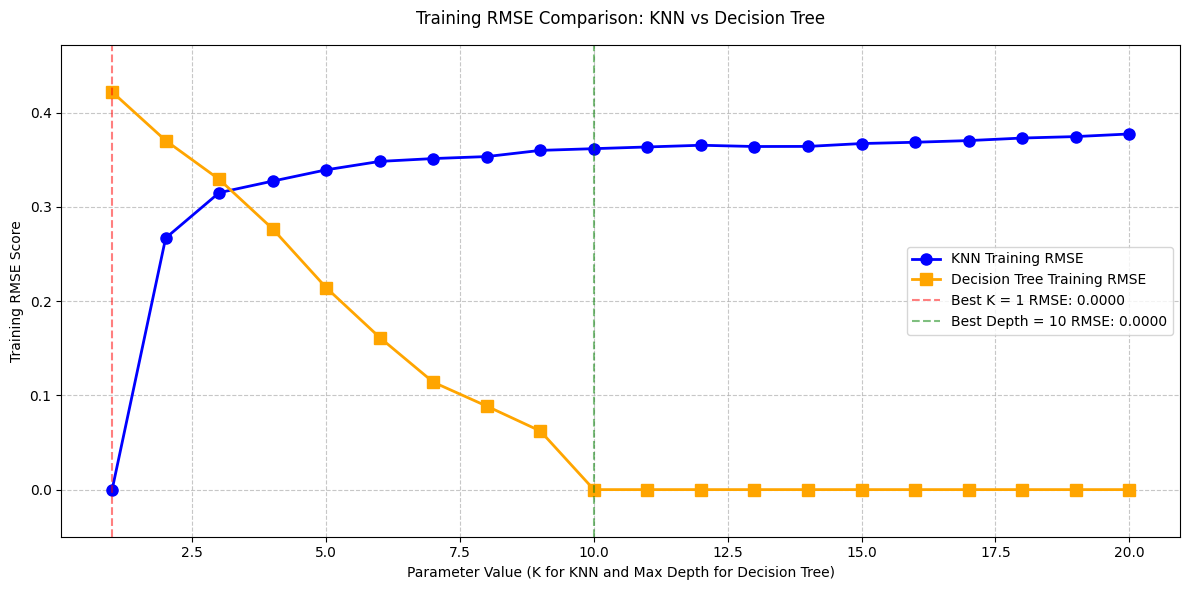

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the regression scores
k_train_scores = []
train_rmse_scores = []
k_values = range(1, 21)  # Testing K values from 1 to 20
max_depths = range(1, 21)  # Testing depth values from 1 to 20

# Calculate performance for KNN
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    k_train_scores.append(train_rmse)

# Calculate performance for Decision Tree
for depth in max_depths:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_regressor.fit(X_train, y_train)

    y_train_pred = dt_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    train_rmse_scores.append(train_rmse)

# Find the best K value based on KNN training RMSE
best_k_index = np.argmin(k_train_scores)
best_k = k_values[best_k_index]
best_k_rmse = k_train_scores[best_k_index]

# Find the best depth value based on Decision Tree training RMSE
best_depth_index = np.argmin(train_rmse_scores)
best_depth = max_depths[best_depth_index]
best_depth_rmse = train_rmse_scores[best_depth_index]

# Create visualization for comparison
plt.figure(figsize=(12, 6))

# Plot KNN Training RMSE
plt.plot(k_values, k_train_scores, marker='o', label='KNN Training RMSE', linewidth=2, markersize=8, color='blue')

# Plot Decision Tree Training RMSE
plt.plot(max_depths, train_rmse_scores, marker='s', label='Decision Tree Training RMSE', linewidth=2, markersize=8, color='orange')

# Highlight the best parameter values
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.5, label=f'Best K = {best_k} RMSE: {best_k_rmse:.4f}')
plt.axvline(x=best_depth, color='g', linestyle='--', alpha=0.5, label=f'Best Depth = {best_depth} RMSE: {best_depth_rmse:.4f}')

# Customize the plot
plt.title('Training RMSE Comparison: KNN vs Decision Tree', fontsize=12, pad=15)
plt.xlabel('Parameter Value (K for KNN and Max Depth for Decision Tree)', fontsize=10)
plt.ylabel('Training RMSE Score', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Set axis limits
plt.ylim(min(min(k_train_scores), min(train_rmse_scores)) - 0.05,
         max(max(k_train_scores), max(train_rmse_scores)) + 0.05)

plt.tight_layout()
plt.show()


# Question 2:

##Overfitting



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Heart Disease dataset
file_path = "processed.cleveland.data"  # Update this with the actual file path
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(file_path, header=None, names=columns)

# Preprocess the data
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert categorical columns to numeric if necessary
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification for presence of heart disease

# Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
base_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
base_tree.fit(X_train, y_train)

# Evaluate the base model
y_train_pred_base = base_tree.predict(X_train)
y_test_pred_base = base_tree.predict(X_test)
accuracy_base_train = accuracy_score(y_train, y_train_pred_base)
accuracy_base_test = accuracy_score(y_test, y_test_pred_base)

print(f"Base Model - Train Accuracy: {accuracy_base_train:.4f}, Test Accuracy: {accuracy_base_test:.4f}")

Base Model - Train Accuracy: 0.9082, Test Accuracy: 0.7556


In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
pruned_tree.fit(X_train, y_train)

# Evaluate the pruned model
y_train_pred_pruned = pruned_tree.predict(X_train)
y_test_pred_pruned = pruned_tree.predict(X_test)
accuracy_pruned_train = accuracy_score(y_train, y_train_pred_pruned)
accuracy_pruned_test = accuracy_score(y_test, y_test_pred_pruned)

print(f"Pruned Model - Train Accuracy: {accuracy_pruned_train:.4f}, Test Accuracy: {accuracy_pruned_test:.4f}")

Pruned Model - Train Accuracy: 0.8551, Test Accuracy: 0.7556


Step2: Detecting Overfitting


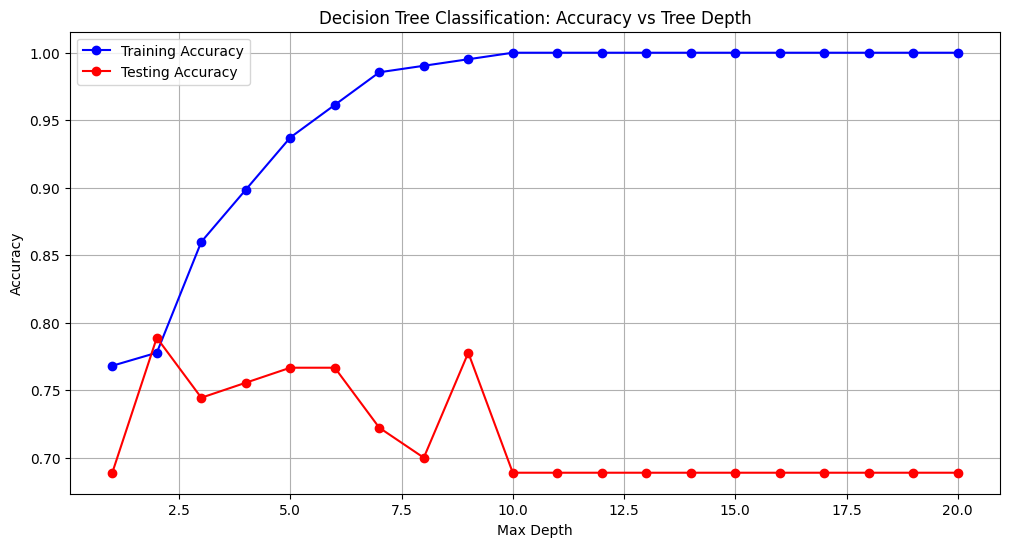


Accuracy at different depths:
Depth  1: Training Accuracy = 0.7681, Testing Accuracy = 0.6889, Gap = 0.0792
Depth  2: Training Accuracy = 0.7778, Testing Accuracy = 0.7889, Gap = -0.0111
Depth  3: Training Accuracy = 0.8599, Testing Accuracy = 0.7444, Gap = 0.1155
Depth  4: Training Accuracy = 0.8986, Testing Accuracy = 0.7556, Gap = 0.1430
Depth  5: Training Accuracy = 0.9372, Testing Accuracy = 0.7667, Gap = 0.1705
Depth  6: Training Accuracy = 0.9614, Testing Accuracy = 0.7667, Gap = 0.1947
Depth  7: Training Accuracy = 0.9855, Testing Accuracy = 0.7222, Gap = 0.2633
Depth  8: Training Accuracy = 0.9903, Testing Accuracy = 0.7000, Gap = 0.2903
Depth  9: Training Accuracy = 0.9952, Testing Accuracy = 0.7778, Gap = 0.2174
Depth 10: Training Accuracy = 1.0000, Testing Accuracy = 0.6889, Gap = 0.3111
Depth 11: Training Accuracy = 1.0000, Testing Accuracy = 0.6889, Gap = 0.3111
Depth 12: Training Accuracy = 1.0000, Testing Accuracy = 0.6889, Gap = 0.3111
Depth 13: Training Accuracy = 1.

In [ ]:
def detect_overfitting():
    # Test different max depths
    max_depths = np.arange(1, 21)
    train_accuracies = []
    test_accuracies = []

    # Calculate accuracy for each depth
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)

        # Calculate accuracy for training and testing
        y_train_pred = dt.predict(X_train)
        y_test_pred = dt.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))

    # Visualization of overfitting
    plt.figure(figsize=(12, 6))
    plt.plot(max_depths, train_accuracies, 'b-', label='Training Accuracy', marker='o')
    plt.plot(max_depths, test_accuracies, 'r-', label='Testing Accuracy', marker='o')

    plt.title('Decision Tree Classification: Accuracy vs Tree Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Find optimal depth
    optimal_depth = max_depths[np.argmax(test_accuracies)]

    # Print accuracy values
    print("\nAccuracy at different depths:")
    for i, depth in enumerate(max_depths):
        print(f"Depth {depth:2d}: Training Accuracy = {train_accuracies[i]:.4f}, Testing Accuracy = {test_accuracies[i]:.4f}, Gap = {train_accuracies[i] - test_accuracies[i]:.4f}")

    return optimal_depth

print("Step2: Detecting Overfitting")
optimal_depth = detect_overfitting()
print(f"\nOptimal tree depth found: {optimal_depth}")

##Comparision


Step 3: Comparing All Models

Model Comparison:

Base Model:
Training Accuracy: 1.0000
Testing Accuracy:  0.6889
Difference:        0.3111

Pruned Model:
Training Accuracy: 0.8551
Testing Accuracy:  0.7556
Difference:        0.0995

Overfitted Model:
Training Accuracy: 1.0000
Testing Accuracy:  0.6889
Difference:        0.3111

Optimal Model:
Training Accuracy: 0.7778
Testing Accuracy:  0.7889
Difference:        -0.0111

Step 4: Cross-validation

Cross-validation results:

Base Model:
Average CV Score: 0.6667
CV Score Std Dev: 0.0460

Pruned Model:
Average CV Score: 0.7966
CV Score Std Dev: 0.0514

Optimal Model:
Average CV Score: 0.6763
CV Score Std Dev: 0.0578


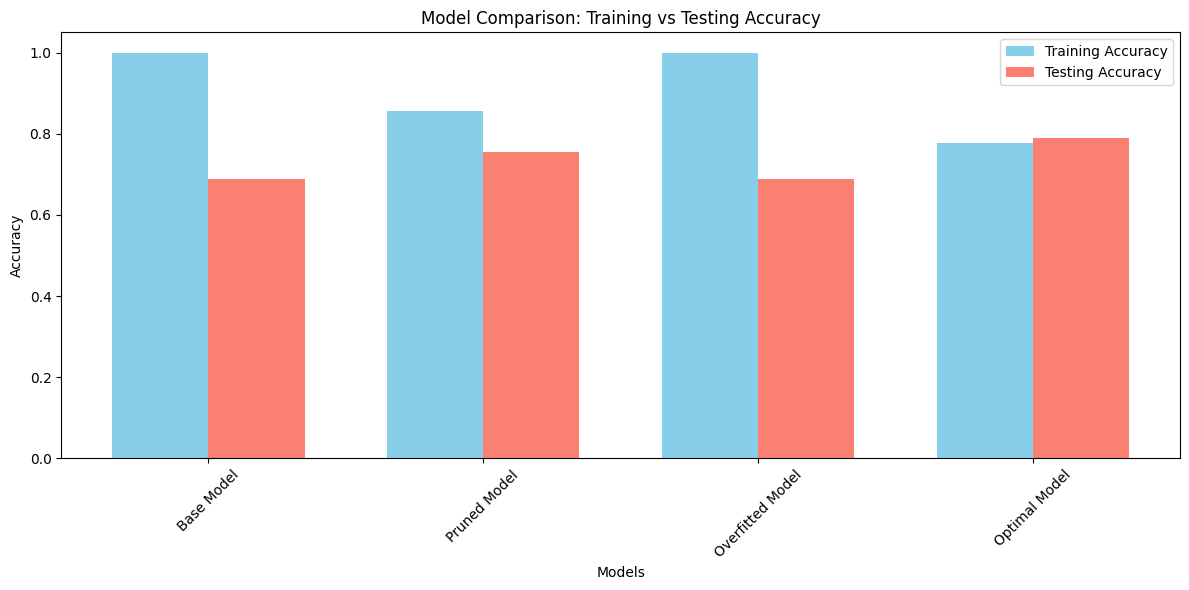

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def compare_all_models(X_train, X_test, y_train, y_test, optimal_depth):
    # Define and evaluate models
    models = {
        'Base Model': DecisionTreeClassifier(max_depth=20, min_samples_split=3, random_state=42),
        'Pruned Model': DecisionTreeClassifier(max_depth=20, min_samples_split=3, min_samples_leaf=10, random_state=42),
        'Overfitted Model': DecisionTreeClassifier(max_depth=61, random_state=42),
        'Optimal Model': DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions and calculate accuracies
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        results[name] = {
            'train_accuracy': accuracy_score(y_train, train_pred),
            'test_accuracy': accuracy_score(y_test, test_pred)
        }

    # Print comparison results
    print("\nModel Comparison:")
    print("="*60)
    for model_name, scores in results.items():
        train_acc = scores['train_accuracy']
        test_acc = scores['test_accuracy']
        diff = train_acc - test_acc

        print(f"\n{model_name}:")
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy:  {test_acc:.4f}")
        print(f"Difference:        {diff:.4f}")

    return results

def validate_models_with_cv(X, y, optimal_depth):
    models = {
        'Base': DecisionTreeClassifier(max_depth=20, min_samples_split=3, random_state=42),
        'Pruned': DecisionTreeClassifier(max_depth=20, min_samples_split=3, min_samples_leaf=10, random_state=42),
        'Optimal': DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
    }

    print("\nCross-validation results:")
    print("="*40)

    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=5)
        print(f"\n{name} Model:")
        print(f"Average CV Score: {cv_scores.mean():.4f}")
        print(f"CV Score Std Dev: {cv_scores.std():.4f}")

# Compare all models
print("\nStep 3: Comparing All Models")
results = compare_all_models(X_train, X_test, y_train, y_test, optimal_depth)

# Perform cross-validation
print("\nStep 4: Cross-validation")
validate_models_with_cv(X_train, y_train, optimal_depth)

# Plot final comparison
def plot_model_comparison(results):
    models = list(results.keys())
    train_acc = [results[m]['train_accuracy'] for m in models]
    test_acc = [results[m]['test_accuracy'] for m in models]

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue')
    plt.bar(x + width/2, test_acc, width, label='Testing Accuracy', color='salmon')

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison: Training vs Testing Accuracy')
    plt.xticks(x, models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the final comparison
plot_model_comparison(results)


# Question 3:

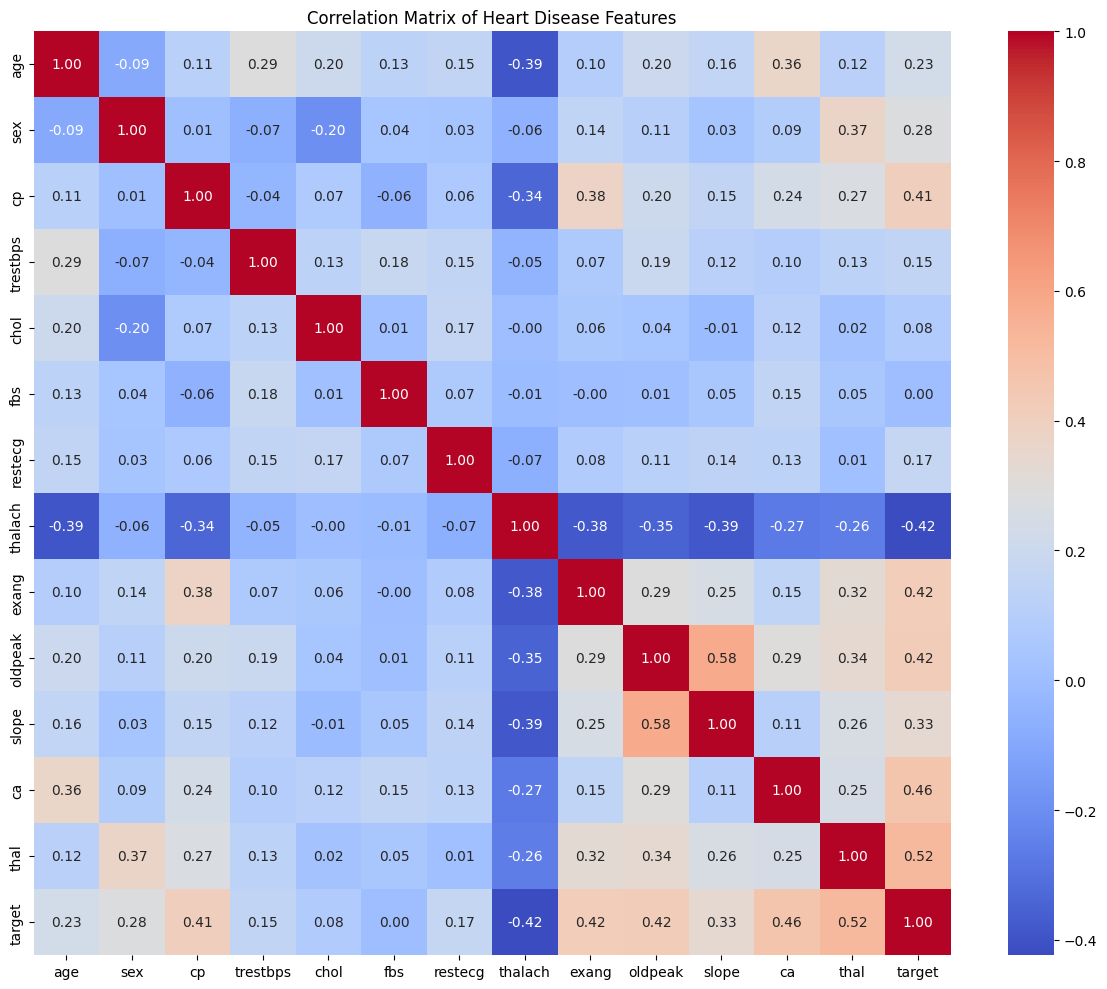


Best n_neighbors for KNN Classifier: 16
Best Accuracy: 0.9222


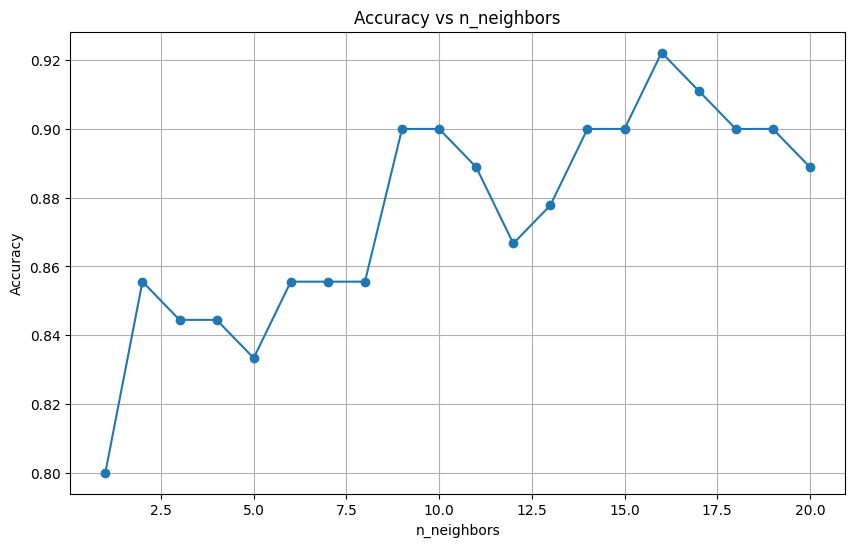


Best max_depth for Decision Tree Classifier: 2
Best Accuracy: 0.7889


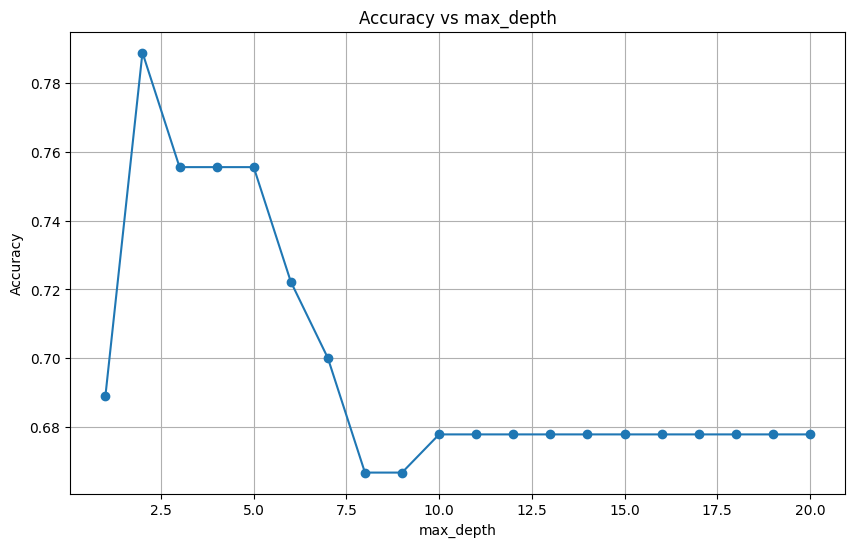


Best n_neighbors for KNN Regressor: 2
Best R²: 0.6528


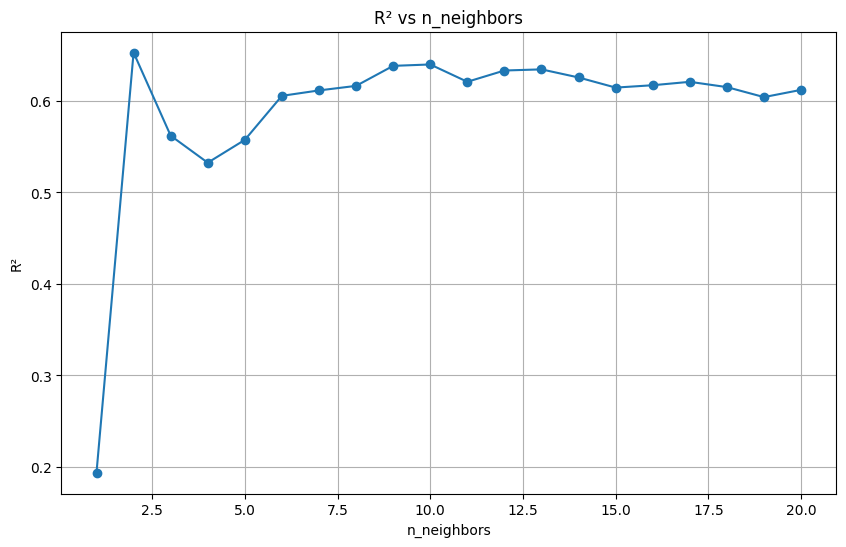


Best max_depth for Decision Tree Regressor: 2
Best R²: 0.3758


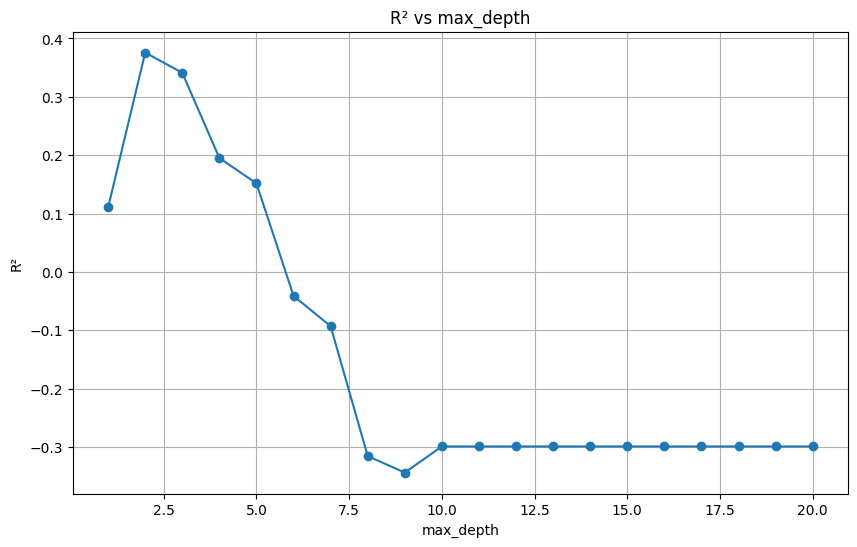

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

def load_and_preprocess_data(file_path, columns):
    """Load and preprocess the Heart Disease dataset"""
    try:
        # Load data
        data = pd.read_csv(file_path, header=None, names=columns)

        # Clean data
        data.replace('?', pd.NA, inplace=True)
        data.dropna(inplace=True)

        # Convert categorical columns to numeric if needed
        for col in ['ca', 'thal']:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        data.dropna(inplace=True)

        # Encode categorical variables
        le = LabelEncoder()
        categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
        for column in categorical_columns:
            data[column] = le.fit_transform(data[column].astype(str))

        return data
    except Exception as e:
        print(f"Error in data loading/preprocessing: {e}")
        return None

def plot_correlation_matrix(X):
    """Plot correlation matrix"""
    plt.figure(figsize=(12, 10))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix of Heart Disease Features")
    plt.tight_layout()
    plt.show()
    return correlation_matrix

def select_features(X, correlation_matrix, threshold=0.1):
    """Select features based on correlation with target variable"""
    # Calculate absolute correlations
    abs_corr = correlation_matrix.abs()

    # Select features that have correlation with target above threshold
    selected_features = [col for col in abs_corr.columns if abs_corr['target'][col] > threshold]

    return X[selected_features]

def evaluate_model(model, X_train, X_test, y_train, y_test, is_classifier=True):
    """Evaluate model performance"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if is_classifier:
        score = accuracy_score(y_test, y_pred)
        metric_name = "Accuracy"
    else:
        score = r2_score(y_test, y_pred)
        metric_name = "R²"

    return score, metric_name

def plot_model_performance(param_range, scores, param_name, metric_name):
    """Plot model performance across parameter range"""
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} vs {param_name}")
    plt.grid(True)
    plt.show()

def main():
    # Define constants
    FILE_PATH = "processed.cleveland.data"  # Update this with the correct file path
    COLUMNS = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
               'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    # Load and preprocess data
    data = load_and_preprocess_data(FILE_PATH, COLUMNS)
    if data is None:
        return

    # Prepare features and target
    X = data.drop('target', axis=1)
    y = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

    # Add target variable to feature set for correlation analysis
    X_with_target = pd.concat([X, y.rename('target')], axis=1)

    # Plot correlation matrix and select features
    correlation_matrix = plot_correlation_matrix(X_with_target)
    X_selected = select_features(X_with_target, correlation_matrix)

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected.drop('target', axis=1), y, test_size=0.3, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model evaluation parameters
    k_range = range(1, 21)
    depth_range = range(1, 21)

    # Evaluate models
    models = {
        'KNN Classifier': (KNeighborsClassifier, k_range, 'n_neighbors', True),
        'Decision Tree Classifier': (DecisionTreeClassifier, depth_range, 'max_depth', True),
        'KNN Regressor': (KNeighborsRegressor, k_range, 'n_neighbors', False),
        'Decision Tree Regressor': (DecisionTreeRegressor, depth_range, 'max_depth', False)
    }

    for model_name, (model_class, param_range, param_name, is_classifier) in models.items():
        scores = []
        for param_value in param_range:
            model = model_class(**{param_name: param_value, 'random_state': 42}
                              if 'Tree' in model_name else {param_name: param_value})

            score, metric_name = evaluate_model(
                model, X_train_scaled, X_test_scaled, y_train, y_test, is_classifier
            )
            scores.append(score)

        best_param = param_range[np.argmax(scores)]
        print(f"\nBest {param_name} for {model_name}: {best_param}")
        print(f"Best {metric_name}: {max(scores):.4f}")

        plot_model_performance(param_range, scores, param_name, metric_name)

if __name__ == "__main__":
    main()
